## Model improvements

Take best models and improve by
1. Data augmentation
2. autostop für epochen

Evaluations 
1. base model "0 model" vergleichen mit endresultat

In [4]:
import torch
import tensorflow as tf
import config
# %load_ext autoreload
%reload_ext autoreload

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [5]:
%reload_ext autoreload
%autoreload 2
from model_benchmark import finalize_models

results = finalize_models(
    csv_path=config.CSV_FILE,
    img_size=(299, 299),
    epochs=10,
    doAutostop=True,
)

/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/src/model_benchmark.py:191: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = bmodel(weights='imagenet', include_top=False, input_shape=img_size + (3,))
2025-06-09 20:24:45.994698: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-09 20:24:45.994737: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-09 20:24:45.994741: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-09 20:24:45.994754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-09 20:24:45.994765: I tensorflow/core/common_runtime/pluggable_device/

Training MobileNetV2 with head dense_dropout...


/opt/anaconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-06-09 20:24:47.689703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating MobileNetV2 with head dense_dropout...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


Model: MobileNetV2 + dense_dropout, F1-Score: 2.79%, Accuracy: 8.33%, Final Val_loss: 326.43%


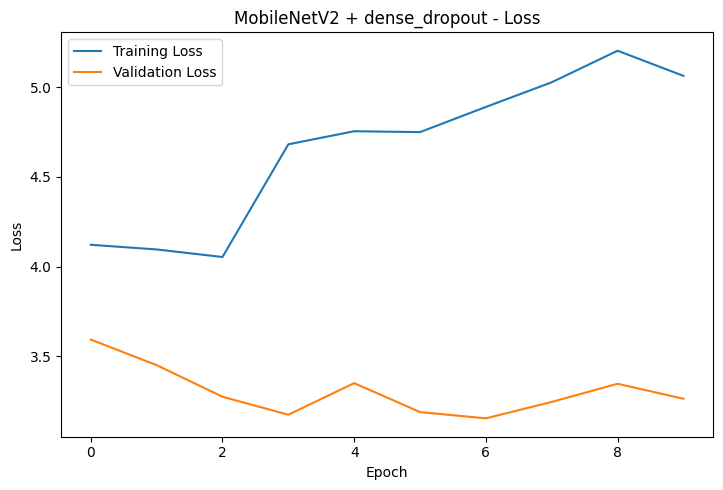

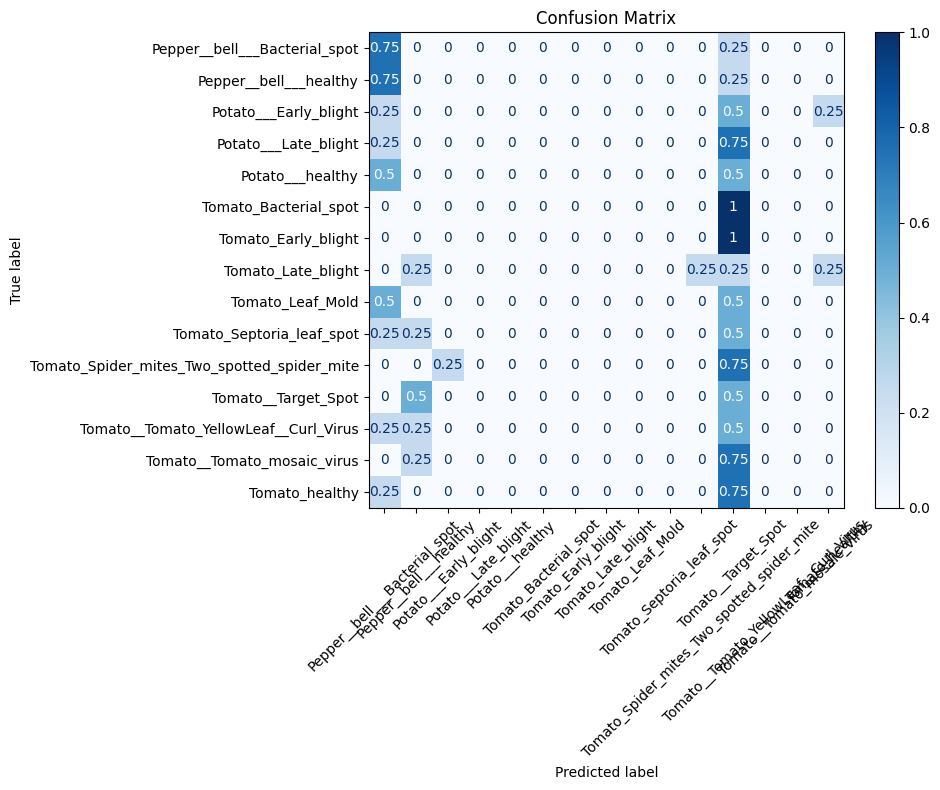

In [6]:
# Display results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix

for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.loss, result.val_loss, model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(result.label_map.keys()),
        normalize='true'
    )